# Translate speech with the Azure AI Speech service

Translation of speech builds on speech recognition by recognizing and transcribing spoken input in a specified language, and returning translations of the transcription in one or more other languages.

- Provision Azure resources for speech translation.
- Generate text translation from speech.
- Synthesize spoken translations.

The pattern for speech translation using the Azure AI Speech SDK is similar to speech recognition, with the addition of information about the source and target languages for translation:

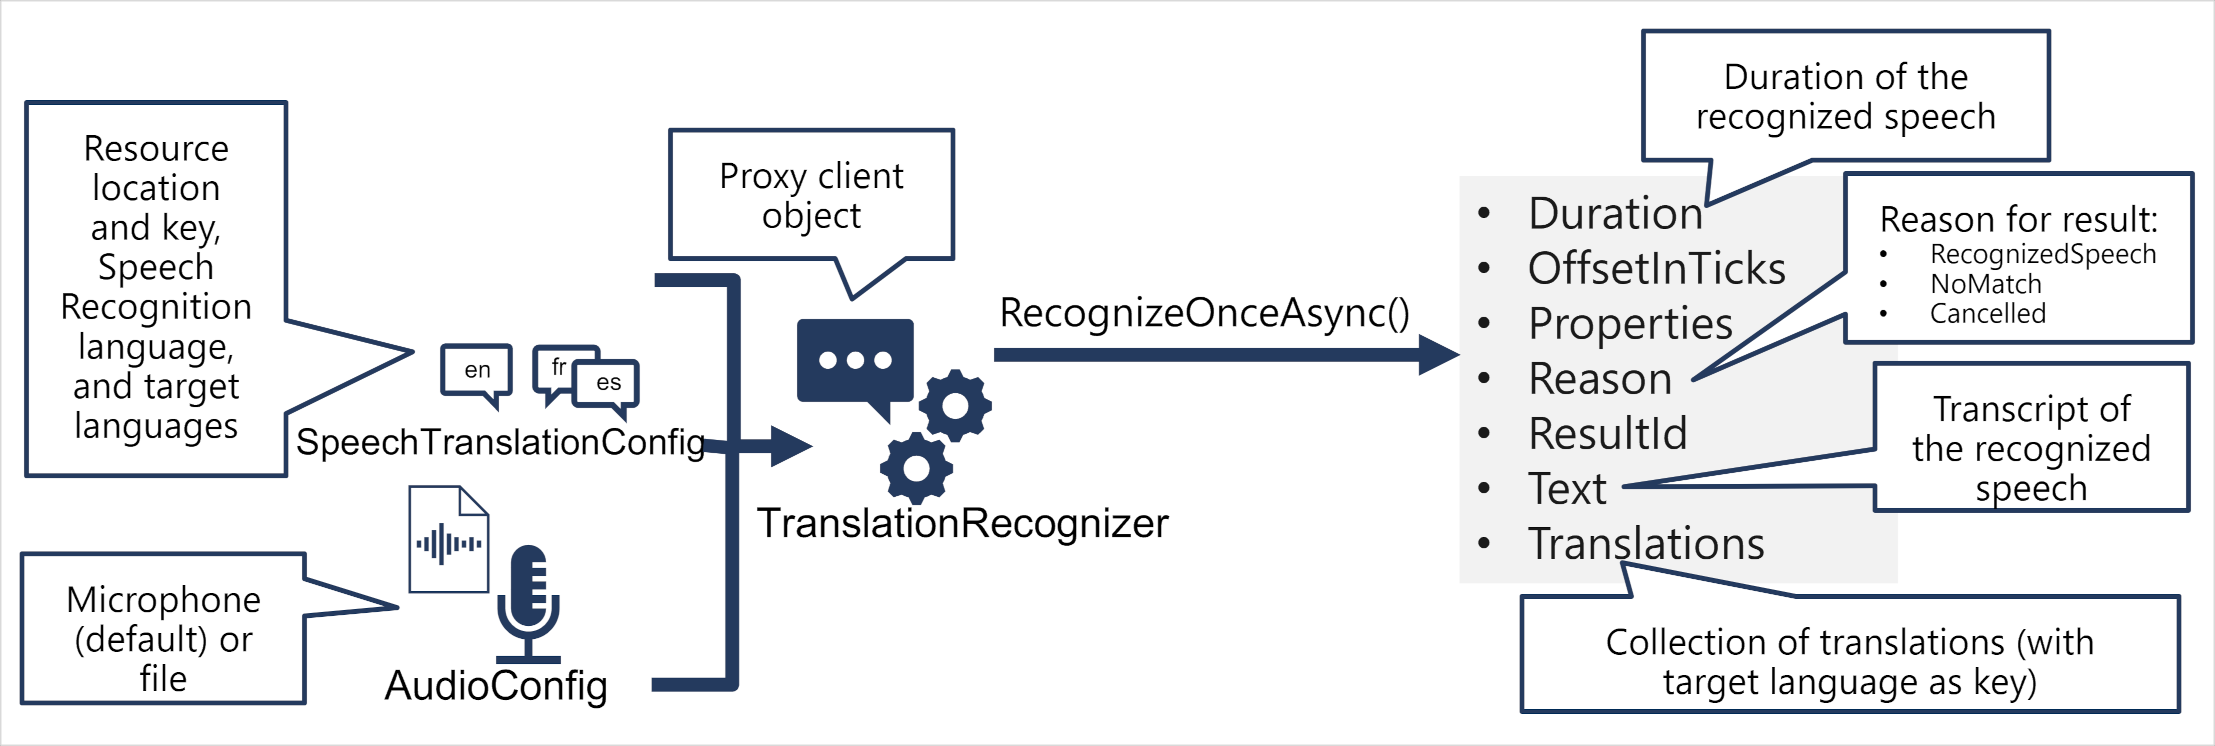

# Importing libraries

In [1]:
from dotenv import load_dotenv
from datetime import datetime
import os

In [3]:
import azure.cognitiveservices.speech as speech_sdk

In [77]:
from playsound import playsound

# Loading configurations

In [2]:
load_dotenv()
ai_key = os.getenv('SPEECH_KEY')
ai_region = os.getenv('SPEECH_REGION')

True

# Configure translation [translation_config]

In [55]:
def create_translation_config(source_language, supported_languages):
  translation_config = speech_sdk.translation.SpeechTranslationConfig(
      ai_key, ai_region)
  translation_config.speech_recognition_language = source_language

  for language in supported_languages:
    translation_config.add_target_language(language)

  print('Supported languages:', ', '.join(supported_languages))
  print('Ready to translate from', translation_config.speech_recognition_language)

  return translation_config

# Configure speech [speech_config]

In [5]:
speech_config = speech_sdk.SpeechConfig(ai_key, ai_region)

# Supported languages

In [79]:
supported_languages = ['en', 'fr', 'es', 'hi']

voices = {
    "en": "en-US-AriaNeural",
    "fr": "fr-FR-HenriNeural",
    "es": "es-ES-ElviraNeural",
    "hi": "hi-IN-MadhurNeural"
}

# Taking audio from file

In [83]:
def take_audio_from_file(audio_file_path):
  try:
    print('🔊⌛ Trying to play the audio using playSound')
    playsound(audio_file_path)
    print('🔊✔️ Audio successfully streamed to speaker device')
  except Exception as e:
    print(f'🔊⚠️ Error while trying to play the audio using playSound {str(e)}')

  audio_config = speech_sdk.AudioConfig(filename=audio_file_path)
  return audio_config

# Translate and speak function

In [92]:
def translate_and_speak(source_language='en-US', target_languages=supported_languages, translation_audio_file=None):
  for target_language in target_languages:
    if target_language not in supported_languages:
      print(f"Error: '{target_language}' is not a supported target language.")
      return

  translation_config = create_translation_config(
      source_language, target_languages)

  if translation_audio_file:
    print("🗃️ Transcribing audio from file:", translation_audio_file)
    audio_config = take_audio_from_file(translation_audio_file)
  else:
    print("🎙️ Listening for audio input from microphone...")
    print("🗣️ Speak now...")
    audio_config = speech_sdk.AudioConfig(use_default_microphone=True)

  translator = speech_sdk.translation.TranslationRecognizer(
      translation_config, audio_config=audio_config)

  result = translator.recognize_once_async().get()

  print(f'⌛ Translating: "{result.text}"')

  for target_language in target_languages:
    translation = result.translations[target_language]
    print(f'✅ Translation to {target_language}: {translation}')

    speech_config.speech_synthesis_voice_name = voices.get(target_language)
    speech_synthesizer = speech_sdk.SpeechSynthesizer(speech_config)
    speak = speech_synthesizer.speak_text_async(translation).get()

    if speak.reason != speech_sdk.ResultReason.SynthesizingAudioCompleted:
      print(speak.reason)

# Main logic

In [97]:
translate_and_speak()
# translate_and_speak(translation_audio_file='station.wav')
# translate_and_speak(source_language='hi-IN')
# translate_and_speak(target_languages=['hi'])

Supported languages: en, fr, es, hi
Ready to translate from en-US
🎙️ Listening for audio input from microphone...
🗣️ Speak now...
⌛ Translating: "I am feeling overpowered and this is so cool."
✅ Translation to en: I am feeling overpowered and this is so cool.
✅ Translation to fr: Je me sens dépassé et c’est tellement cool.
✅ Translation to es: Me siento abrumado y esto es genial.
✅ Translation to hi: मैं अधिक शक्तिशाली महसूस कर रहा हूं और यह बहुत अच्छा है।
